### PCA REGRESSION

In [1]:
# Import libraraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
data = pd.read_csv(r"C:\Users\H P\OneDrive\Desktop\AutoData.csv")

In [3]:
data

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Target column : Price

In [4]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
data.describe(include="O")

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
data.shape

(205, 25)

In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
data

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [11]:
# Split x and y on dataset
x = data.iloc[:,:24]
y = data["price"]

In [12]:
# Encoding columns
label_columns = ["make","enginetype","cylindernumber","fuelsystem"]
ohe_columns = ["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation"]
numerical_columns = x.select_dtypes(exclude=['O']).columns

In [13]:
# Split train and test on dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((164, 24), (164,), (41, 24), (41,))

In [15]:
x_train.reset_index(drop=True, inplace=True)

In [16]:
y_train.reset_index(drop=True, inplace=True)

In [17]:
y_test.reset_index(drop=True, inplace=True)

In [18]:
x_test.reset_index(drop=True, inplace=True)

for train

In [19]:
# Apply OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop="first")
x_train_encoded = onehot_encoder.fit_transform(x_train[ohe_columns])

In [20]:
feature_names =onehot_encoder.get_feature_names_out(input_features=ohe_columns)

In [21]:
feature_names

array(['fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear'], dtype=object)

In [22]:
x_train_encoded = pd.DataFrame(x_train_encoded, columns=feature_names)

In [23]:
x_train[feature_names] = x_train_encoded

In [24]:
x_train.drop(columns=ohe_columns, inplace=True)

In [25]:
x_train

,symboling,make,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,0,mazda rx-7 gs,104.9,175.0,66.1,54.4,2700,ohc,four,134,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,peugeot 504,107.9,186.7,68.4,56.7,3075,l,four,120,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,toyota corona hardtop,95.7,169.7,63.6,59.1,2280,ohc,four,92,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,nissan latio,94.5,165.3,63.8,54.5,1971,ohc,four,97,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,honda civic 1300,96.5,167.5,65.2,53.3,2289,ohc,four,110,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1,nissan clipper,99.2,178.5,67.9,49.7,3139,ohcv,six,181,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
160,1,bmw z4,103.5,189.0,66.9,55.7,3055,ohc,six,164,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
161,1,nissan latio,94.5,165.3,63.8,54.5,1938,ohc,four,97,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
162,3,toyota corona,102.9,183.5,67.7,52.0,3016,dohc,six,171,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Apply label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to each column in label_column
for col in label_columns:
    x_train[col] = label_encoder.fit_transform(x_train[col])

In [27]:
x_train

,symboling,make,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,0,49,104.9,175.0,66.1,54.4,2700,3,2,134,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,69,107.9,186.7,68.4,56.7,3075,2,2,120,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,100,95.7,169.7,63.6,59.1,2280,3,2,92,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,62,94.5,165.3,63.8,54.5,1971,3,2,97,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,32,96.5,167.5,65.2,53.3,2289,3,2,110,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1,58,99.2,178.5,67.9,49.7,3139,5,3,181,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
160,1,12,103.5,189.0,66.9,55.7,3055,3,3,164,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
161,1,62,94.5,165.3,63.8,54.5,1938,3,2,97,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
162,3,99,102.9,183.5,67.7,52.0,3016,0,3,171,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
x_train.describe()

,symboling,make,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.902439,63.432927,98.728659,174.127439,65.922561,53.715854,2556.439024,2.945122,2.103659,126.414634,...,0.908537,0.176829,0.457317,0.030488,0.341463,0.475610,0.115854,0.579268,0.384146,0.018293
std,1.244470,34.577756,5.968884,12.080544,2.123469,2.479386,511.935461,1.109098,0.661091,40.469014,...,0.289150,0.382693,0.499701,0.172452,0.475653,0.500934,0.321030,0.495189,0.487882,0.134418
min,-2.000000,0.000000,86.600000,144.600000,61.800000,47.800000,1819.000000,0.000000,0.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,34.750000,94.500000,166.675000,64.175000,51.900000,2163.000000,3.000000,2.000000,98.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,65.500000,96.750000,173.100000,65.500000,54.100000,2422.500000,3.000000,2.000000,119.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,93.250000,102.100000,183.200000,66.675000,55.525000,2939.250000,3.000000,2.000000,141.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,123.000000,115.600000,202.600000,72.300000,59.800000,4066.000000,6.000000,5.000000,326.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to the features in data and transform data
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

In [30]:
# Apply Standerdscaler
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train[x_train.columns] = scaler.fit_transform(x_train.columns)

In [31]:
x_train

,symboling,make,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,0.4,0.398374,0.631034,0.524138,0.409524,0.550000,0.392078,0.500000,0.4,0.250000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,0.560976,0.734483,0.725862,0.628571,0.741667,0.558968,0.333333,0.4,0.195312,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.4,0.813008,0.313793,0.432759,0.171429,0.941667,0.205162,0.500000,0.4,0.085938,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.6,0.504065,0.272414,0.356897,0.190476,0.558333,0.067646,0.500000,0.4,0.105469,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.4,0.260163,0.341379,0.394828,0.323810,0.458333,0.209168,0.500000,0.4,0.156250,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.6,0.471545,0.434483,0.584483,0.580952,0.158333,0.587450,0.833333,0.6,0.433594,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
160,0.6,0.097561,0.582759,0.765517,0.485714,0.658333,0.550067,0.500000,0.6,0.367188,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
161,0.6,0.504065,0.272414,0.356897,0.190476,0.558333,0.052960,0.500000,0.4,0.105469,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
162,1.0,0.804878,0.562069,0.670690,0.561905,0.350000,0.532710,0.000000,0.6,0.394531,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


for test

In [32]:
x_test

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,...,six,209,mpfi,3.62,3.390,8.00,182,5400,16,22
1,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22
2,0,nissan nv200,gas,std,four,sedan,fwd,front,97.2,173.4,...,four,120,2bbl,3.33,3.470,8.50,97,5200,27,34
3,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,186.6,...,four,121,mpfi,3.54,3.070,9.31,110,5250,21,28
4,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,190.9,...,five,183,idi,3.58,3.640,21.50,123,4350,22,25
5,1,nissan juke,gas,std,two,hatchback,fwd,front,94.5,165.6,...,four,97,2bbl,3.15,3.290,9.40,69,5200,31,37
6,0,toyota corolla,diesel,std,four,hatchback,fwd,front,95.7,166.3,...,four,110,idi,3.27,3.350,22.50,56,4500,38,47
7,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,166.3,...,four,98,2bbl,3.19,3.030,9.00,70,4800,28,34
8,0,subaru tribeca,gas,std,four,wagon,fwd,front,97.0,173.5,...,four,108,mpfi,3.62,2.640,9.00,94,5200,25,31
9,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,171.7,...,four,97,idi,3.01,3.400,23.00,52,4800,37,46


In [33]:
# Apply OneHot encoding
x_test_encoded = onehot_encoder.transform(x_test[ohe_columns])

In [34]:
x_test_encoded = pd.DataFrame(x_test_encoded, columns=feature_names)

In [35]:
x_test[feature_names] = x_test_encoded

In [36]:
x_test.drop(columns=ohe_columns, inplace=True)

In [37]:
x_test

,symboling,make,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,0,bmw x4,103.5,189.0,66.9,55.7,3230,ohc,six,209,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,audi 5000s (diesel),99.5,178.2,67.9,52.0,3053,ohc,five,131,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,nissan nv200,97.2,173.4,65.2,54.7,2302,ohc,four,120,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,saab 99e,99.1,186.6,66.5,56.1,2658,ohc,four,121,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1,buick century luxus (sw),110.0,190.9,70.3,58.7,3750,ohc,five,183,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,1,nissan juke,94.5,165.6,63.8,53.3,2028,ohc,four,97,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0,toyota corolla,95.7,166.3,64.4,52.8,2275,ohc,four,110,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0,toyota mark ii,95.7,166.3,64.4,52.8,2140,ohc,four,98,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0,subaru tribeca,97.0,173.5,65.4,53.0,2455,ohcf,four,108,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,2,vokswagen rabbit,97.3,171.7,65.5,55.7,2261,ohc,four,97,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [38]:
x_test.shape

(41, 28)

In [39]:
from sklearn.preprocessing import LabelEncoder

# Assuming label_columns is a list of column names to be encoded
label_columns = ["make", "enginetype", "cylindernumber", "fuelsystem"]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on training data for each column
for col in label_columns:
    x_test[col] = label_encoder.fit_transform(x_test[col])

In [40]:
x_test

,symboling,make,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,0,1,103.5,189.0,66.9,55.7,3230,1,3,209,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0,99.5,178.2,67.9,52.0,3053,1,1,131,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,22,97.2,173.4,65.2,54.7,2302,1,2,120,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,24,99.1,186.6,66.5,56.1,2658,1,2,121,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1,4,110.0,190.9,70.3,58.7,3750,1,1,183,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,1,20,94.5,165.6,63.8,53.3,2028,1,2,97,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0,29,95.7,166.3,64.4,52.8,2275,1,2,110,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0,33,95.7,166.3,64.4,52.8,2140,1,2,98,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0,28,97.0,173.5,65.4,53.0,2455,2,2,108,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,2,34,97.3,171.7,65.5,55.7,2261,1,2,97,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [41]:
# Apply MinMaxScaler
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])

In [42]:
x_test

,symboling,make,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,0.4,0.026316,0.492711,0.714925,0.578947,0.642105,0.722222,0.25,0.6,0.599190,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,0.000000,0.376093,0.553731,0.666667,0.252632,0.648839,0.25,0.2,0.283401,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.4,0.578947,0.309038,0.482090,0.429825,0.536842,0.337479,0.25,0.4,0.238866,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.631579,0.364431,0.679104,0.543860,0.684211,0.485075,0.25,0.4,0.242915,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.2,0.105263,0.682216,0.743284,0.877193,0.957895,0.937811,0.25,0.2,0.493927,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.6,0.526316,0.230321,0.365672,0.307018,0.389474,0.223881,0.25,0.4,0.145749,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.4,0.763158,0.265306,0.376119,0.359649,0.336842,0.326285,0.25,0.4,0.198381,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,0.4,0.868421,0.265306,0.376119,0.359649,0.336842,0.270315,0.25,0.4,0.149798,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.4,0.736842,0.303207,0.483582,0.447368,0.357895,0.400912,0.50,0.4,0.190283,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,0.8,0.894737,0.311953,0.456716,0.456140,0.642105,0.320481,0.25,0.4,0.145749,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


PCA

In [43]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want to keep
# You can specify the number of components explicitly or as a percentage of variance explained
# For example, n_components=2 or n_components=0.95
pca = PCA(n_components=2)

# Fit PCA to your data and transform it
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Now X_train_pca and X_test_pca contain the transformed data with reduced dimensions

In [44]:
x_train_pca

array([[ 1.08023792, -0.39447197],
       [ 1.21758528, -0.04465143],
       [-0.36550427, -0.70337048],
       [-0.29459876, -1.03042823],
       [-1.14718827,  0.28492227],
       [-1.03412901, -0.1864548 ],
       [-1.15193436,  0.36488466],
       [ 1.47479461, -0.30932212],
       [-0.75118516,  0.65569761],
       [-1.3768615 ,  0.2208031 ],
       [ 0.16526164,  1.39915907],
       [-0.48947076, -0.81776398],
       [ 0.12400958, -0.97170926],
       [-0.47131515, -0.60591963],
       [-0.25811468, -0.2767175 ],
       [ 0.40438504,  0.97675024],
       [-0.2512484 ,  1.34233792],
       [ 0.37031722,  1.15629765],
       [-1.37942449,  0.27577362],
       [ 0.41492701, -0.5509595 ],
       [ 0.01337246,  1.46261501],
       [-0.47734783, -0.13017041],
       [ 0.35931173,  1.35351627],
       [ 0.3621565 , -1.1837106 ],
       [-1.50397415,  0.29913033],
       [ 0.71813375,  0.40694117],
       [-0.3283003 , -1.0614774 ],
       [ 0.04231406,  1.44103412],
       [-0.48934618,

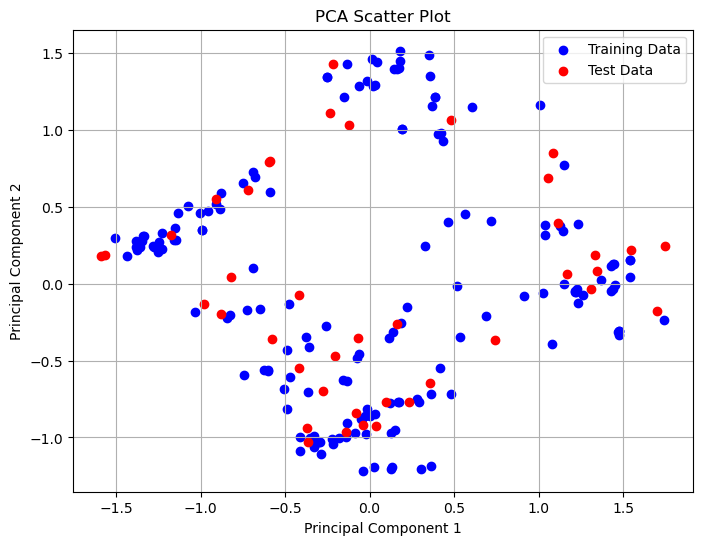

In [45]:
# Plot
import matplotlib.pyplot as plt

# Assuming x_train_pca contains the transformed training data after PCA
# Assuming x_test_pca contains the transformed test data after PCA

# Create a scatter plot for the transformed training data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c='blue', label='Training Data')
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c='red', label='Test Data')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
# import svm
from sklearn import svm
pca_model = svm.SVR()

In [48]:
pca_model.fit(x_train_pca, y_train)

SVR()

In [49]:
# Predict the train and test
y_pred_train_pca = pca_model.predict(x_train_pca)
y_pred_test_pca = pca_model.predict(x_test_pca)

In [50]:
y_pred_train_pca

array([10688.65459571, 10695.70140386, 10636.13466144, 10638.48834732,
       10635.54250435, 10631.71235577, 10636.84204006, 10692.33024991,
       10650.23045455, 10635.55471972, 10685.64103696, 10634.63529918,
       10648.35299112, 10634.52622396, 10643.20517931, 10688.79507429,
       10678.30378597, 10688.45462441, 10636.10962198, 10664.51837831,
       10683.48152753, 10639.24334108, 10687.5616256 , 10655.09545716,
       10637.69616537, 10691.74933814, 10638.32228139, 10683.9498402 ,
       10635.11103756, 10639.8265192 , 10653.10233364, 10653.95174596,
       10635.0936682 , 10696.58156269, 10679.55614905, 10645.00805489,
       10685.56981807, 10636.22085122, 10640.99174183, 10636.78201889,
       10659.46800023, 10695.61012958, 10696.31374827, 10681.97879639,
       10636.23895728, 10683.02831851, 10637.6996443 , 10688.48052814,
       10641.02453024, 10636.09774788, 10633.9808179 , 10696.15780788,
       10637.90454282, 10635.8580009 , 10651.51005199, 10653.35965802,
      

In [51]:
y_pred_test_pca

array([10696.87800924, 10678.17692281, 10643.58416051, 10649.85385438,
       10694.91139799, 10636.00016718, 10634.18875708, 10641.03932904,
       10648.63751141, 10637.99473126, 10653.74499441, 10676.22504389,
       10696.28705041, 10642.05276402, 10691.52092261, 10631.95509558,
       10638.17651991, 10658.45334236, 10642.67252048, 10648.68031521,
       10645.82641446, 10660.3450891 , 10634.87559477, 10637.81167121,
       10636.75758972, 10694.38559029, 10689.68991101, 10696.46355884,
       10635.65674097, 10696.03007914, 10691.59056748, 10631.86878551,
       10659.79309825, 10696.65986912, 10643.86543735, 10692.44356392,
       10680.721541  , 10679.49251634, 10637.57241178, 10658.86019798,
       10641.94786785])

In [52]:
# Accuracy
print("Accuracy score for train:", pca_model.score(x_train_pca, y_train))
print("Accuracy score for test:", pca_model.score(x_test_pca, y_test))

Accuracy score for train: -0.10573183823595955
Accuracy score for test: -0.09745165711724058


In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate RMSE of train data
mse_train = mean_squared_error(y_train, y_pred_train_pca)
print("Mean squared error:", mse_train)
rmse_train = np.sqrt(mse_train)
print("RMSE VALUE:", rmse_train)

Mean squared error: 65943455.56124493
RMSE VALUE: 8120.557589306594


In [54]:
# calculate RMSE of test data
mse_test = mean_squared_error(y_test, y_pred_test_pca)
print("Mean squared error:", mse_test)
rmse_test = np.sqrt(mse_test)
print("RMSE VALUE:", rmse_test)

Mean squared error: 86637246.53387836
RMSE VALUE: 9307.913113790779


In [55]:
# Assuming y_train and y_pred_train are your actual and predicted target values for the train set
r_squared_train = r2_score(y_train, y_pred_train_pca)
print("R-squared for train data:", r_squared_train)

R-squared for train data: -0.10573183823595955


In [56]:
# Assuming y_test and y_pred_test are your actual and predicted target values for the test set
r_squared_test = r2_score(y_test, y_pred_test_pca)
print("R-squared for test data:", r_squared_test)

R-squared for test data: -0.09745165711724058


In [57]:
# Check to the Adjusted R Squared

def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [58]:
# For train data
n_train, p = x_train_pca.shape[0], x_train_pca.shape[1]
model_train_adjusted_r2 = adjusted_r_squared(r_squared_train, n_train, p)

# For test data
n_test = x_test_pca.shape[0]
model_test_adjusted_r2 = adjusted_r_squared(r_squared_test, n_test, p)

In [59]:
print("Adjusted R-squared for train data:", model_train_adjusted_r2)
print("Adjusted R-squared for test data:", model_test_adjusted_r2)

Adjusted R-squared for train data: -0.11946763746870448
Adjusted R-squared for test data: -0.15521227064972676


In [60]:
d1 = {'Title':['RMSE_train', 'RMSE_test', 'R squared_train', 'R squared_test', 'Adjusted R squraed_train', 'Adjusted R squraed_test'], 'Vales':[rmse_train, rmse_test, r_squared_train, r_squared_test, model_train_adjusted_r2, model_test_adjusted_r2]}
pd.DataFrame(d1)

,Title,Vales
0,RMSE_train,8120.557589
1,RMSE_test,9307.913114
2,R squared_train,-0.105732
3,R squared_test,-0.097452
4,Adjusted R squraed_train,-0.119468
5,Adjusted R squraed_test,-0.155212


Model Building

In [61]:
# import svm
from sklearn import svm
clf = svm.SVR()

In [62]:
clf.fit(x_train, y_train)

SVR()

In [63]:
# Prediction on train and test
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [64]:
y_pred_train

array([10665.26527778, 10672.34158163, 10643.67260537, 10635.96169046,
       10634.52519535, 10635.17115752, 10636.90864829, 10670.58549562,
       10651.60759979, 10632.1289639 , 10667.3408395 , 10645.84778475,
       10647.09966083, 10641.53997426, 10648.60463785, 10665.50837208,
       10661.79123625, 10666.94231284, 10631.90629373, 10652.85477128,
       10667.12869564, 10646.2362932 , 10668.81366307, 10655.68131036,
       10633.22706824, 10667.43431444, 10637.28255683, 10666.67756622,
       10639.36649181, 10637.43210523, 10653.67075473, 10647.21634523,
       10631.74905063, 10670.25931372, 10660.16774114, 10646.2936112 ,
       10667.35697555, 10632.12992541, 10645.60293454, 10636.37540639,
       10657.049703  , 10672.21785923, 10673.99963109, 10663.93758112,
       10632.08632667, 10665.10776038, 10636.11857834, 10665.87549274,
       10640.03109675, 10635.59583654, 10642.73332406, 10668.62928616,
       10637.31868963, 10632.2509455 , 10650.66604956, 10655.03288073,
      

In [65]:
y_pred_test

array([10672.90850875, 10660.78932784, 10642.61772466, 10649.97758   ,
       10667.91126286, 10633.9973186 , 10648.48708393, 10640.46484569,
       10652.54823712, 10649.12899478, 10653.03125696, 10657.15207383,
       10672.64019579, 10648.64063357, 10671.32382704, 10637.63039455,
       10638.16115124, 10656.22455574, 10642.96796671, 10649.37795807,
       10644.79227462, 10656.90304357, 10643.3955027 , 10636.11589161,
       10639.2556423 , 10671.4757344 , 10667.07590198, 10669.67800508,
       10643.27485304, 10671.68143993, 10671.16623361, 10637.72459049,
       10653.27680242, 10672.28480277, 10648.92411481, 10665.92815352,
       10662.13736722, 10663.17908826, 10637.9042482 , 10656.40238423,
       10647.97520958])

In [66]:
# Accuracy score
print("Accuracy score for train:", clf.score(x_train, y_train))
print("Accuracy score for test:", clf.score(x_test, y_test))

Accuracy score for train: -0.10815071841154467
Accuracy score for test: -0.09985094863706445


In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate RMSE of train data
mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean squared error:", mse_train)
rmse_train = np.sqrt(mse_train)
print("RMSE VALUE:", rmse_train)

Mean squared error: 66087712.34381271
RMSE VALUE: 8129.434933856886


In [68]:
# calculate RMSE of test data
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean squared error:", mse_test)
rmse_test = np.sqrt(mse_test)
print("RMSE VALUE:", rmse_test)

Mean squared error: 86826656.25371571
RMSE VALUE: 9318.082219733613


In [69]:
# Assuming y_train and y_pred_train are your actual and predicted target values for the train set
r_squared_train = r2_score(y_train, y_pred_train)
print("R-squared for train data:", r_squared_train)

R-squared for train data: -0.10815071841154467


In [70]:
# Assuming y_test and y_pred_test are your actual and predicted target values for the test set
r_squared_test = r2_score(y_test, y_pred_test)
print("R-squared for test data:", r_squared_test)

R-squared for test data: -0.09985094863706445


In [71]:
# Check to the Adjusted R Squared

def adjusted_r_squared(r_squared, n, k):
    adjusted_r2 = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return adjusted_r2

In [72]:
# For train data
n_train, p = x_train.shape[0], x_train.shape[1]
model_train_adjusted_r2 = adjusted_r_squared(r_squared_train, n_train, p)

In [73]:
# For test data
n_test = x_test.shape[0]
model_test_adjusted_r2 = adjusted_r_squared(r_squared_test, n_test, p)

In [74]:
print("Adjusted R-squared for train data:", model_train_adjusted_r2)
print("Adjusted R-squared for test data:", model_test_adjusted_r2)

Adjusted R-squared for train data: -0.3379893859339391
Adjusted R-squared for test data: -2.6661698287902147


In [75]:
d1 = {'Title':['RMSE_train', 'RMSE_test', 'R squared_train', 'R squared_test', 'Adjusted R squraed_train', 'Adjusted R squraed_test'], 'Vales':[rmse_train, rmse_test, r_squared_train, r_squared_test, model_train_adjusted_r2, model_test_adjusted_r2]}
pd.DataFrame(d1)

,Title,Vales
0,RMSE_train,8129.434934
1,RMSE_test,9318.082220
2,R squared_train,-0.108151
3,R squared_test,-0.099851
4,Adjusted R squraed_train,-0.337989
5,Adjusted R squraed_test,-2.666170


In [76]:
# Checking for Muliticollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the independent variables for the model
x = add_constant(x_train)

# Calculate VIF
vif = pd.DataFrame()
vif['variable'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Filter out of the constant term
vif = vif[vif['variable'] != 'const']
print(vif)

               variable        VIF
1             symboling   3.105700
2                  make   1.681487
3             wheelbase  12.092094
4             carlength  12.753187
5              carwidth   8.947102
6             carheight   3.423432
7            curbweight  26.894121
8            enginetype   1.599728
9        cylindernumber   2.388799
10           enginesize  15.427725
11           fuelsystem   2.873937
12            boreratio   2.652438
13               stroke   1.711018
14     compressionratio  88.297932
15           horsepower  14.524721
16              peakrpm   3.030903
17              citympg  31.583809
18           highwaympg  25.754123
19         fueltype_gas  96.543126
20     aspiration_turbo   3.162222
21       doornumber_two   3.768844
22      carbody_hardtop   2.437049
23    carbody_hatchback  11.248604
24        carbody_sedan  14.775306
25        carbody_wagon   7.522002
26       drivewheel_fwd  12.602350
27       drivewheel_rwd  12.270271
28  enginelocation_r